In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def mnk(X, Y):
    a, b = np.polyfit(X, Y, deg=1)

    S_x = np.std(X) ** 2
    S_y = np.std(Y) ** 2
    da = 2 * np.sqrt((S_y/S_x - a ** 2)/(len(X) - 2))
    db = da * np.sqrt(np.mean(X**2))
    
    return a, b, da, db

In [3]:
g  = 9.8155  # m/s^2
dg = 0.0005  # m/s^2

l0 = 107; dl0 = 1     # mm
d0 =  12; dd0 = 0.5   # mm
h0 = 1.8; dh0 = 0.05  # mm

dl = 1
ml_data = pd.read_csv('ml_data.csv')
ml_data['m'] += 142.7 + 152
dm = 0.5

l = ml_data['l']
F = ml_data['m'] * g / 1000
dF = np.sqrt(ml_data['dm'] + 2) * 0.5 * g / 1000

L = l/l0
dL = np.sqrt((dl/l0)**2 + ((l*dl0)/(l0*l0))**2)

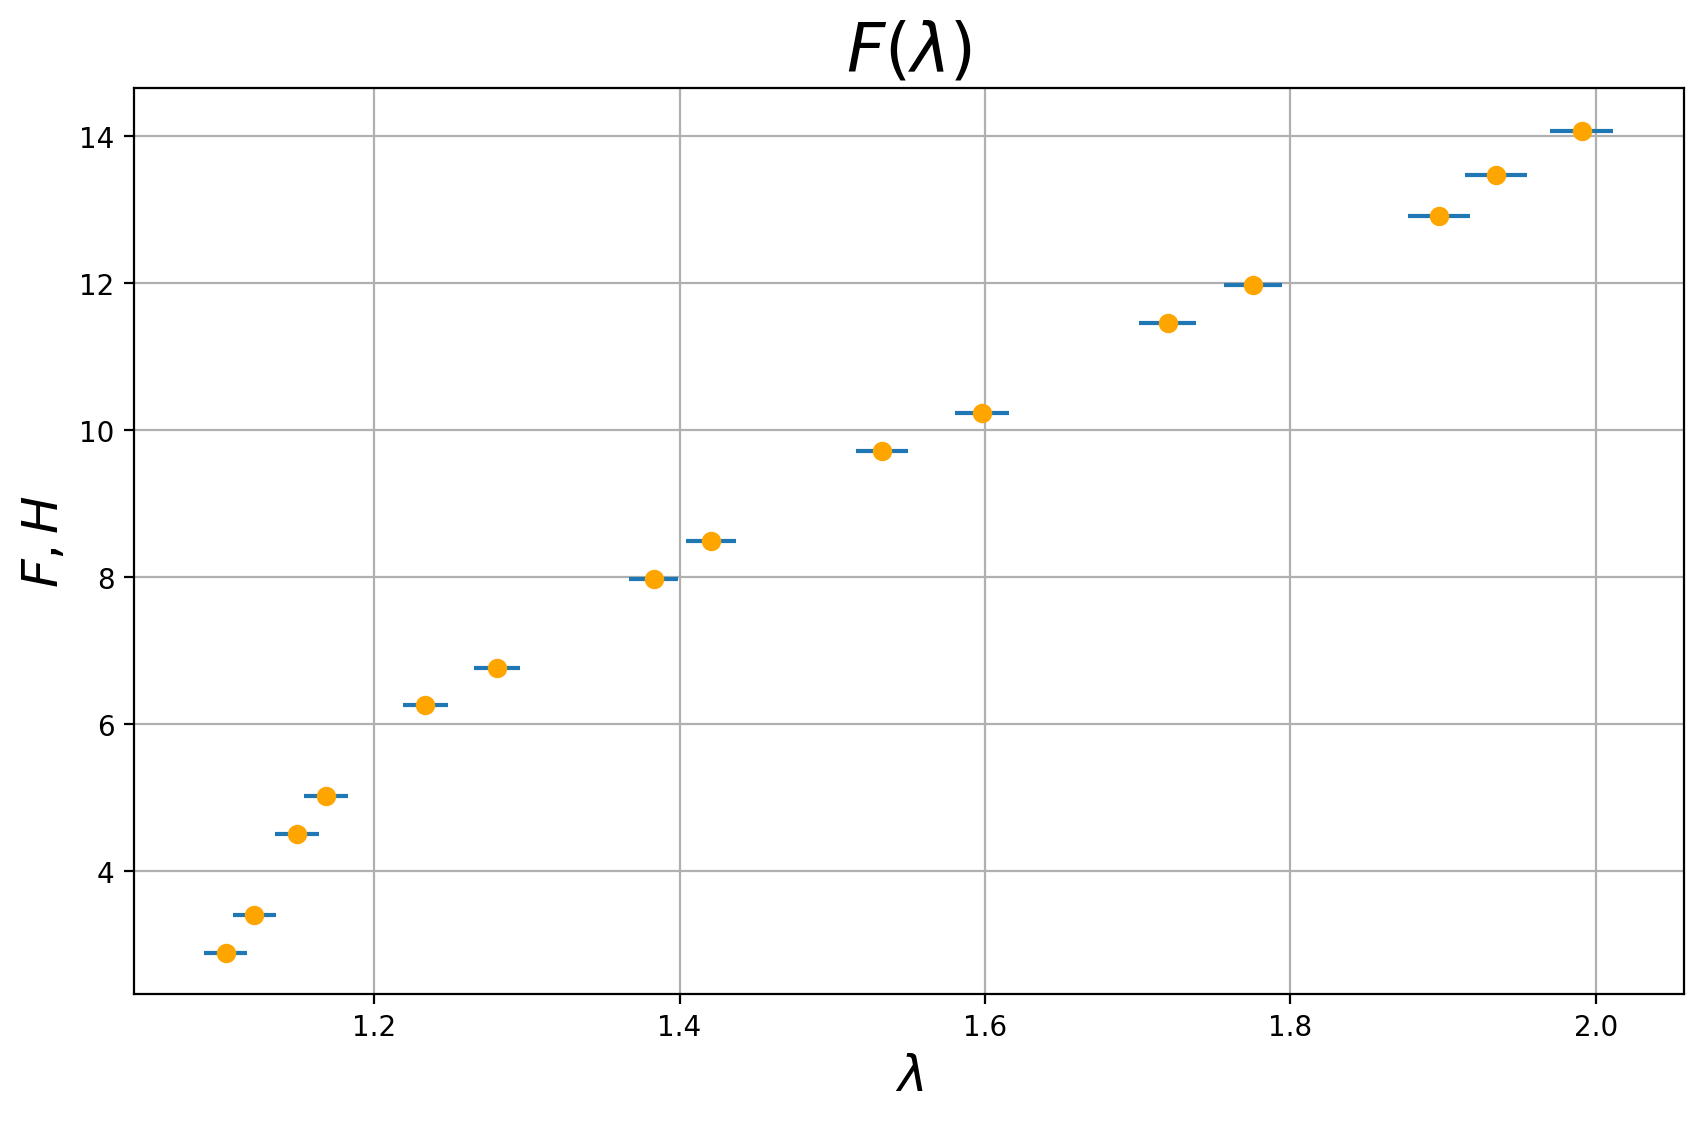

In [4]:
plt.figure(figsize=(10, 6), dpi=200)
plt.grid(True)
plt.title(r"$F(\lambda)$", fontsize=24)
plt.xlabel(r"$\lambda$", fontsize=18)
plt.ylabel(r"$F,Н$", fontsize=18)

plt.errorbar(L, F, xerr=dL, yerr=dF, linestyle='')
plt.scatter(L, F, color='orange', zorder=2)

plt.savefig('../plots/F_L.png')

10.091294542455897 -5.993568892318321 0.376505720263103 0.6156396177165419


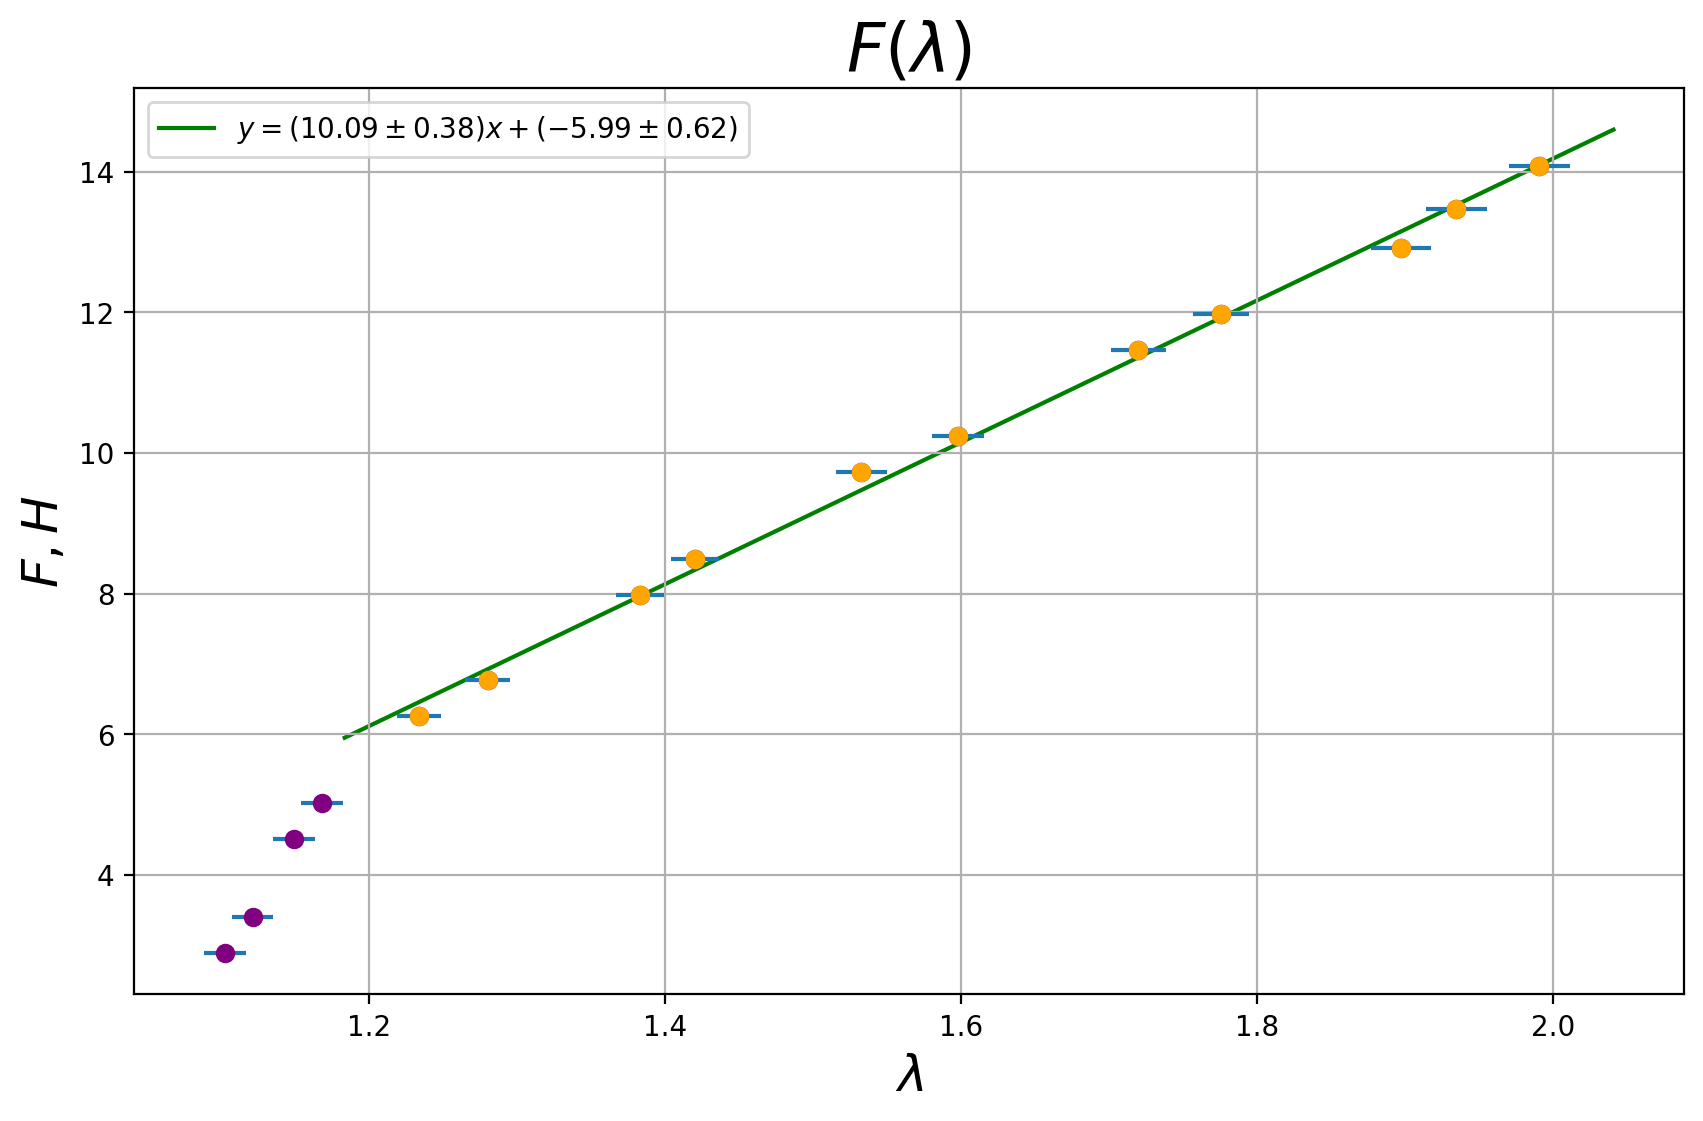

In [5]:
plt.figure(figsize=(10, 6), dpi=200)
plt.grid(True)
plt.title(r"$F(\lambda)$", fontsize=24)
plt.xlabel(r"$\lambda$", fontsize=18)
plt.ylabel(r"$F,Н$", fontsize=18)

mnk_sl = slice(4, None)

X = L
dX = dL
plt.errorbar(X, F, xerr=dX, yerr=dF, linestyle='', zorder=3)
plt.scatter(X, F, color='purple', zorder=4)
plt.scatter(X[mnk_sl], F[mnk_sl], color='orange', zorder=5)


a, b, da, db = mnk(X[mnk_sl], F[mnk_sl])
print(a,b,da,db)
x_mm = np.array([np.min(X[mnk_sl]) - 0.05, np.max(X[mnk_sl]) + 0.05])
plt.plot(x_mm, a*x_mm + b, color='green', label=f"$y=({a:.2f} \pm {da:.2f})x+({b:.2f} \pm {db:.2f})$", zorder=1)
plt.legend()

# plt.savefig('../plots/F_L.png')

6.799352115994669 2.1103197993767404 0.17608632526133225 0.2064117421833521


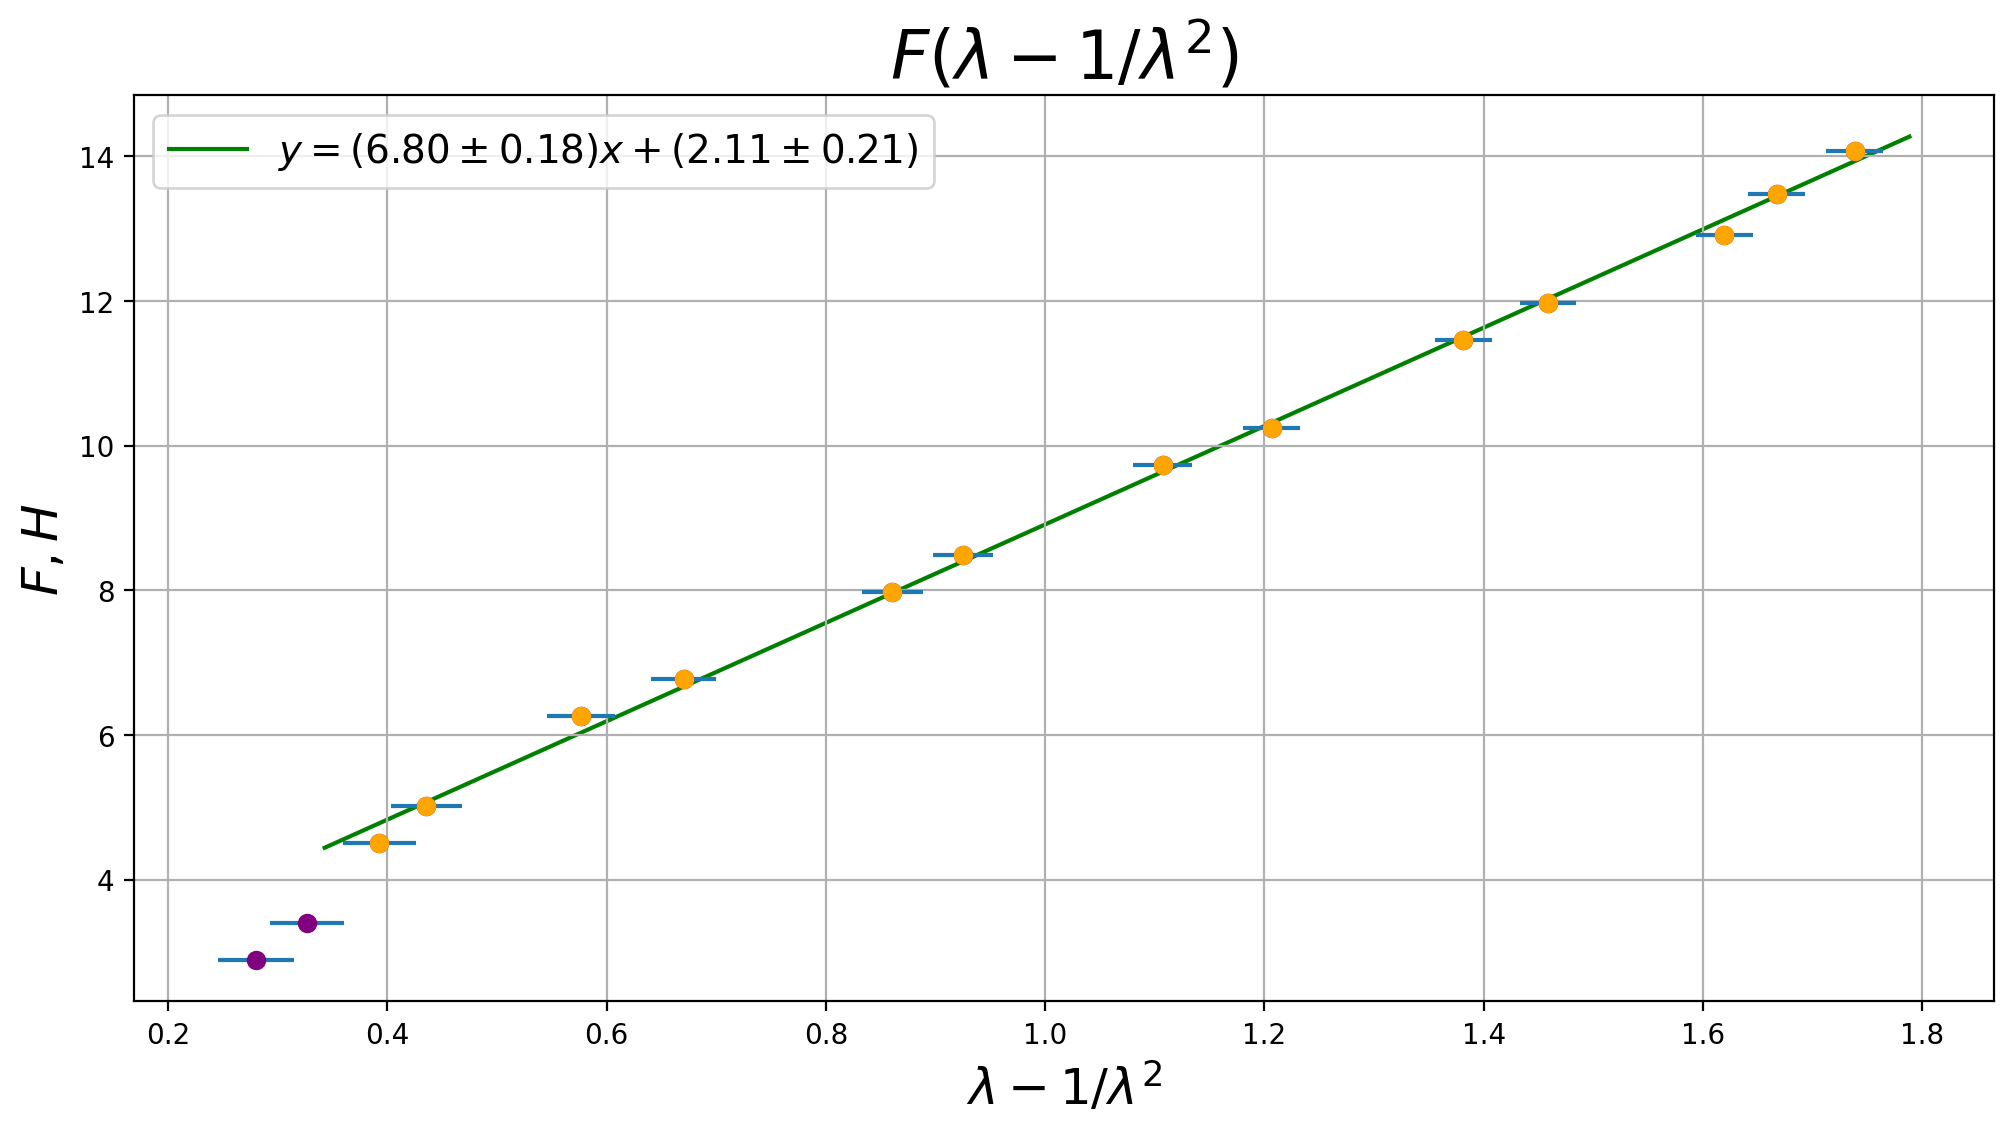

In [6]:
plt.figure(figsize=(12, 6), dpi=200)
plt.grid(True)
plt.title(r"$F(\lambda - 1/\lambda^2)$", fontsize=24)
plt.xlabel(r"$\lambda - 1/\lambda^2$", fontsize=18)
plt.ylabel(r"$F,Н$", fontsize=18)

mnk_sl = slice(2, None)

X = L - 1/(L**2)
dX = (1 + 2/(L**3))*dL
plt.errorbar(X, F, xerr=dX, yerr=dF, linestyle='', zorder=3)
plt.scatter(X, F, color='purple', zorder=4)
plt.scatter(X[mnk_sl], F[mnk_sl], color='orange', zorder=5)


a, b, da, db = mnk(X[mnk_sl], F[mnk_sl])
print(a,b,da,db)
x_mm = np.array([np.min(X[mnk_sl]) - 0.05, np.max(X[mnk_sl]) + 0.05])
plt.plot(x_mm, a*x_mm + b, color='green', label=f"$y=({a:.2f} \pm {da:.2f})x+({b:.2f} \pm {db:.2f})$", zorder=1)
plt.legend(fontsize=14)

plt.savefig('../plots/F_Linearized.png')

In [7]:
# f = (ES_0/3)*(L - 1/L^2)
# ES_0/3 = 6.80 +- 0.18 in Newtons
#            a      da

S0 = d0 * h0                                      # mm^2
dS0 = np.sqrt((h0 * dd0) ** 2 + (dh0 * d0) ** 2)  # mm^2

E = 3 * a / (S0 * 1e-6)
dE = E * np.sqrt((da/a)**2 + (dS0/S0)**2)

# E = (944000 +- 53000) Pa = (0.94 +- 0.05) MPa

k = E * l0 * d0 * h0 * 1e-9/ 3
dk = k * np.sqrt((dE/E)**2 + (dl0/l0)**2 + (dd0/d0)**2 + (dh0/h0)**2)

def A(l):
    """Returns the amount of work done to strech to l(mm) and it's error in (J)"""
    # A = k (L^2/2 + 1/L - 1.5)
    L = l/l0
    dL = L * np.sqrt((dl/l)**2 + (dl0/l0)**2)
    
    work = k * (L**2/2 + 1/L - 1.5)
    dwork = k * (L - 1/L**2) * dL
    
    return work, dwork

In [8]:
E, dE

(944354.4605548151, 53240.132880688485)

In [9]:
adiabat_data_raw = pd.read_csv('adiabat.csv')

In [10]:
adiabat_data_raw.groupby('l', as_index=False).mean()

,l,V0,V
0,134,43.200000,31.333333
1,143,44.000000,23.333333
2,152,41.600000,9.333333
3,158,40.666667,-1.333333
4,164,39.066667,-11.133333
5,168,36.800000,-20.933333
6,174,34.133333,-35.200000
7,183,31.200000,-55.733333


In [11]:
# A(L) = a*l0*(L^2/2+1/L-1.5)=EV0/3(L^2/2+1/L-1.5), where V0=S0l0 - volume of non deformed sample
c = 195 # mV/K

dV = 0.8

adiabat_data = pd.DataFrame(columns=['l','dl', 'T', 'dT'])
adiabat_data['l'] = adiabat_data_raw['l']
adiabat_data['dl'] = 1;
adiabat_data['T'] = (adiabat_data_raw['V0'] - adiabat_data_raw['V'])/c
adiabat_data['dT'] = np.sqrt(2 * dV**2)/c

adiabat = pd.DataFrame(columns=['l', 'dl', 'T', 'dT', 'A', 'dA'])
adiabat[['l', 'dl', 'T']] = adiabat_data.groupby('l', as_index=False).mean()[['l','dl', 'T']]
dT_sys = adiabat_data.groupby('l', as_index=False).mean()['dT']
dT_rand = adiabat_data.groupby('l', as_index=False).std(ddof=0)['T']
adiabat['dT'] = np.sqrt(dT_sys**2 + dT_rand**2)
adiabat['A'] = adiabat['l'].map(lambda x: A(x)[0])
adiabat['dA'] = adiabat['l'].map(lambda x: A(x)[1])
adiabat

,l,dl,T,dT,A,dA
0,134,1.0,0.060855,0.005882,0.060153,0.006698
1,143,1.0,0.105983,0.006769,0.102799,0.008813
2,152,1.0,0.165470,0.007915,0.154923,0.010926
3,158,1.0,0.215385,0.006487,0.194572,0.012344
4,164,1.0,0.257436,0.006211,0.237931,0.013775
5,168,1.0,0.296068,0.010897,0.268824,0.014738
6,174,1.0,0.355556,0.006116,0.318043,0.016199
7,183,1.0,0.445812,0.011764,0.398126,0.018433


In [12]:
adiabat['A']*1000

0     60.152784
1    102.799485
2    154.923138
3    194.571830
4    237.931215
5    268.823673
6    318.043000
7    398.125835
Name: A, dtype: float64

0.001143701245649637 -0.010272728290920512 1.837240070471058e-05 0.004427417072854132


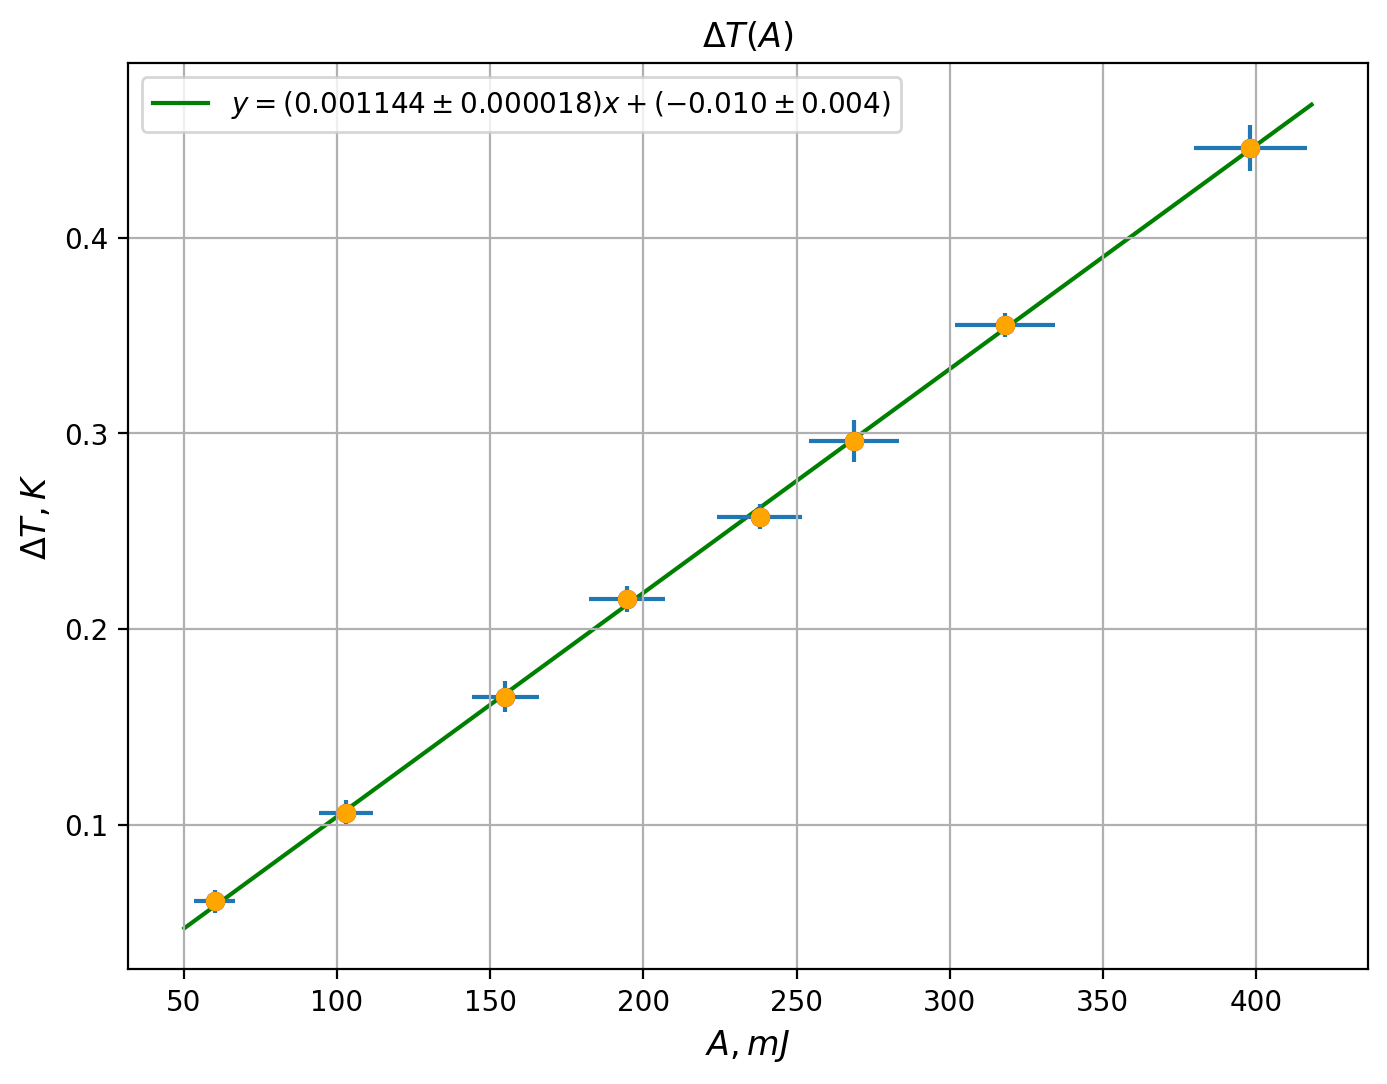

In [13]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"$\Delta T(A)$")
plt.xlabel(r"$A, mJ$", fontsize=12)
plt.ylabel(r"$\Delta T, K$", fontsize=12)

mnk_sl = slice(None, None)

X = adiabat['A'] * 1000
dX = adiabat['dA'] * 1000

Y = adiabat['T']
dY = adiabat['dT']

plt.errorbar(X, Y, xerr=dX, yerr=dY, linestyle='', zorder=1)
plt.scatter(X, Y, color='purple', zorder=2)
plt.scatter(X[mnk_sl], Y[mnk_sl], color='orange', zorder=3)

a, b, da, db = mnk(X[mnk_sl], Y[mnk_sl])
print(a,b,da,db)
x_mm = np.array([np.min(X[mnk_sl]) - 10, np.max(X[mnk_sl]) + 20])
plt.plot(x_mm, a*x_mm + b, color='green', label=f"$y=({a:.6f} \pm {da:.6f})x+({b:.3f} \pm {db:.3f})$", zorder=0)
plt.legend()

plt.savefig('../plots/dT_A.png')

In [14]:
C_l = 1/a  # mJ/K
dC_l = da/a**2
C_l, dC_l

(874.3542107729254, 14.04561372934993)

In [15]:
data_168 = pd.read_csv("168.csv")
t, V = data_168['t'], data_168['V']

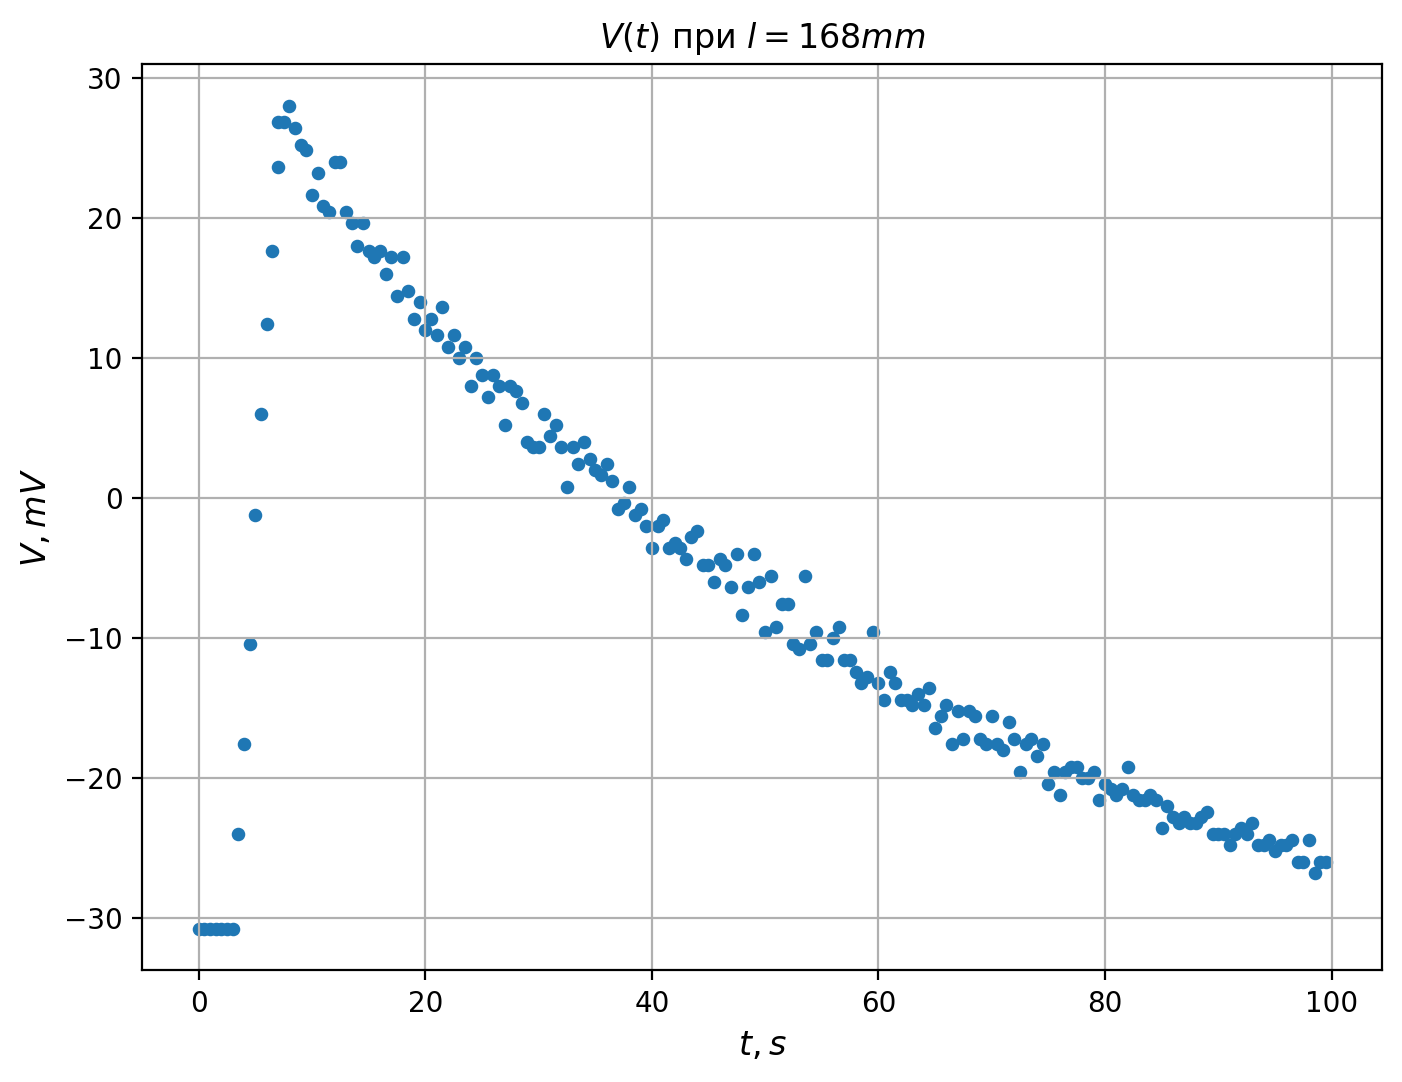

In [16]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"$V(t)$ при $l=168mm$")
plt.xlabel(r"$t, s$", fontsize=12)
plt.ylabel(r"$V, mV$", fontsize=12)

plt.scatter(t, V, s=15)

plt.savefig('../plots/V_t_168.png')

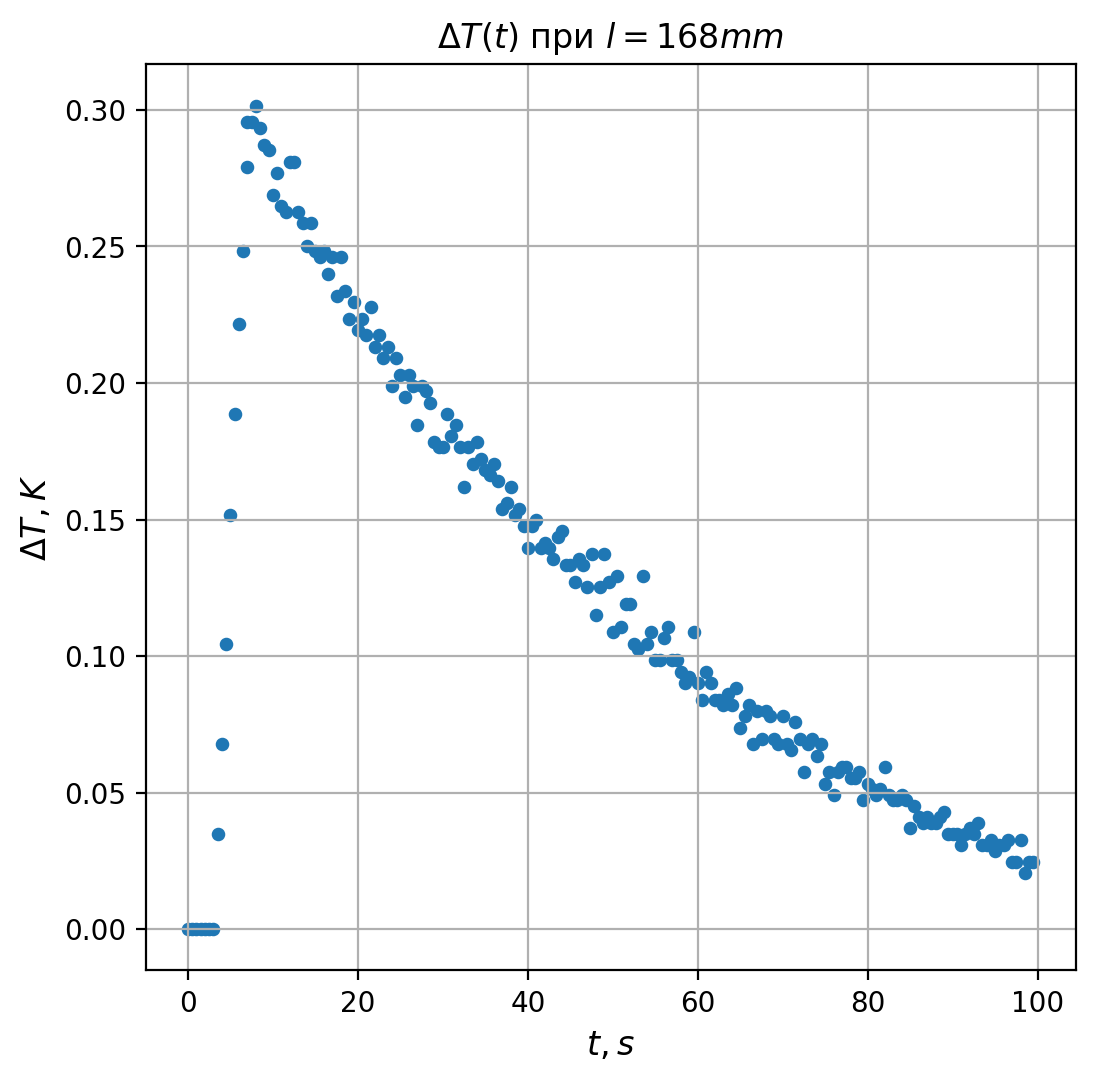

In [17]:
plt.figure(figsize=(6, 6), dpi=200)
plt.grid(True)
plt.title(r"$\Delta T(t)$ при $l=168mm$")
plt.xlabel(r"$t, s$", fontsize=12)
plt.ylabel(r"$\Delta T, K$", fontsize=12)

T = (V - V[0]) / c

plt.scatter(t, T, s=15)

plt.savefig('../plots/T_t_168.png')

-0.021491716082413147 -1.0539360981857455 0.0006333375231654375 0.02353916294729211


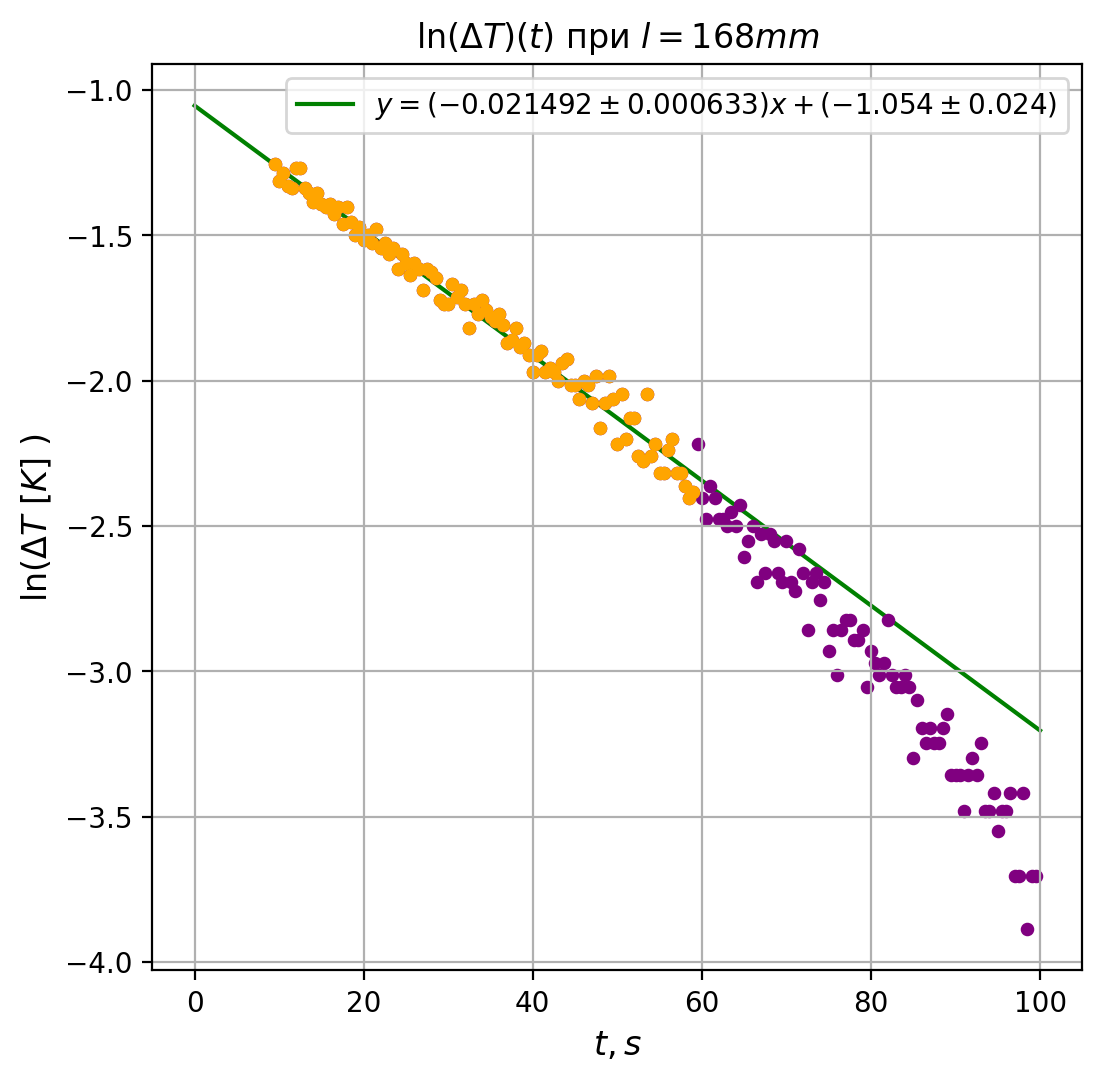

In [18]:
plt.figure(figsize=(6, 6), dpi=200)
plt.grid(True)
plt.title(r"$\ln(\Delta T)(t)$ при $l=168mm$")
plt.xlabel(r"$t, s$", fontsize=12)
plt.ylabel(r"$\ln(\Delta T\ [K]\ )$", fontsize=12)

T = (V - V[0]) / c

sl = slice(20, None)
mnk_sl = slice(0, 100)

X = t[sl]
Y = np.log(T[sl])

plt.scatter(X, Y, s=15, color='purple')
plt.scatter(X[mnk_sl], Y[mnk_sl], s=15, color='orange')

a, b, da, db = mnk(X[mnk_sl], Y[mnk_sl])
print(a,b,da,db)
x_mm = np.array([0, 100])
plt.plot(x_mm, a*x_mm + b, color='green', label=f"$y=({a:.6f} \pm {da:.6f})x+({b:.3f} \pm {db:.3f})$", zorder=-1)
plt.legend()

plt.savefig('../plots/lnT_t_168.png')

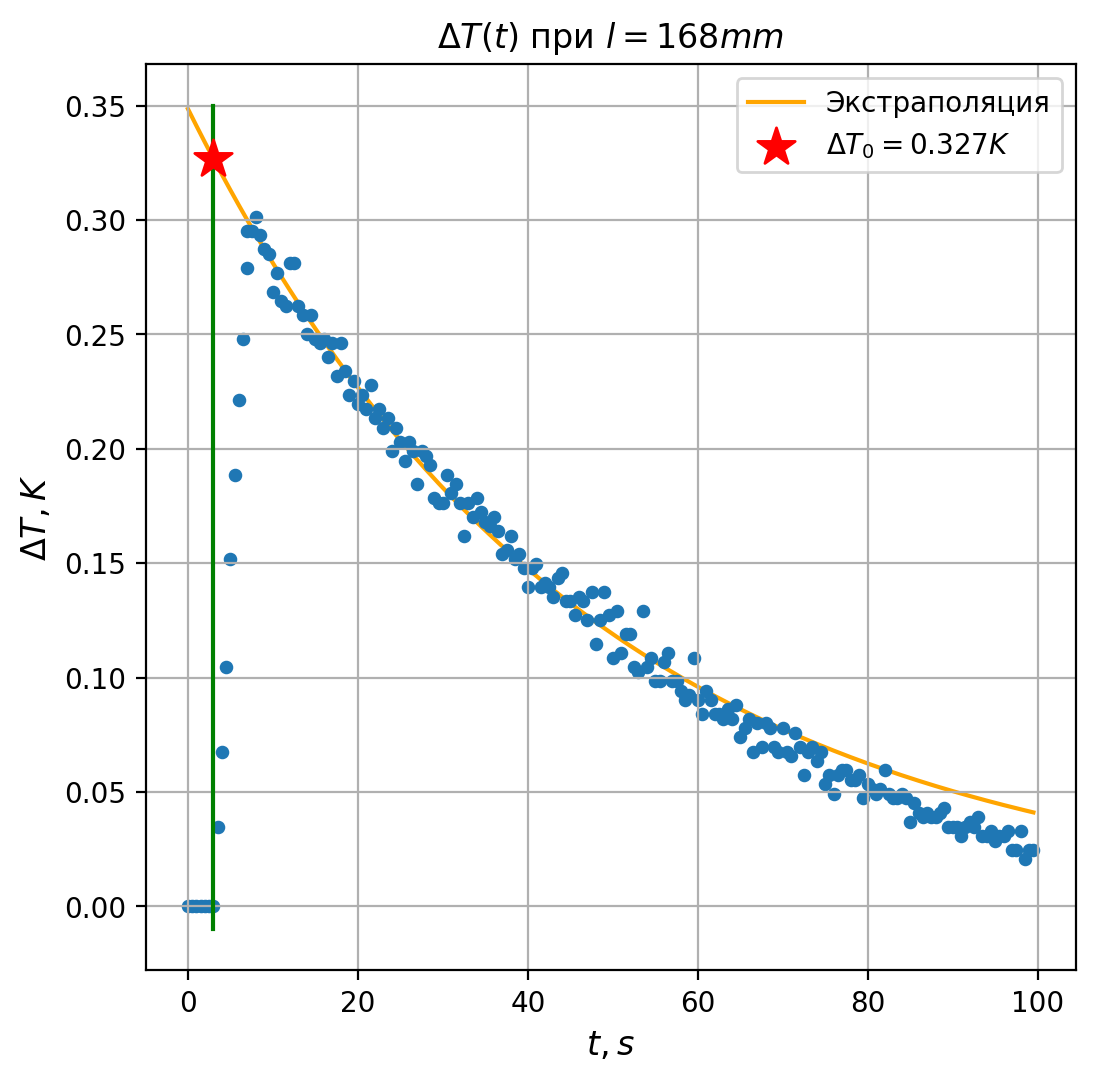

In [19]:
plt.figure(figsize=(6, 6), dpi=200)
plt.grid(True)
plt.title(r"$\Delta T(t)$ при $l=168mm$")
plt.xlabel(r"$t, s$", fontsize=12)
plt.ylabel(r"$\Delta T, K$", fontsize=12)

T = (V - V[0]) / c

plt.plot(t, np.exp(b)*np.exp(a*t), color='orange', label='Экстраполяция', zorder=-1)
plt.scatter(t, T, s=15)

plt.plot([3, 3], [-0.01, 0.35], color='green')
plt.scatter([3], [np.exp(b)*np.exp(a*3)], marker='*', color='red', s=200, zorder=4, label=f'$\Delta T_0 = {np.exp(b)*np.exp(a*3):.3f}K$')

plt.legend()
plt.savefig('../plots/T_t_168_extrapolation.png')

In [20]:
t0 = 3
dt0 = 0.5
DT = np.exp(b)*np.exp(a*t0)
dDT = DT*np.sqrt(db**2 + (a*dt0)**2 + (t0*da)**2)
DT,dDT,100*dDT/DT

(0.326798584816352, 0.008478995096693573, 2.594562978740693)

In [21]:
data_183 = pd.read_csv("183.csv")
t, V = data_183['t'], data_183['V']

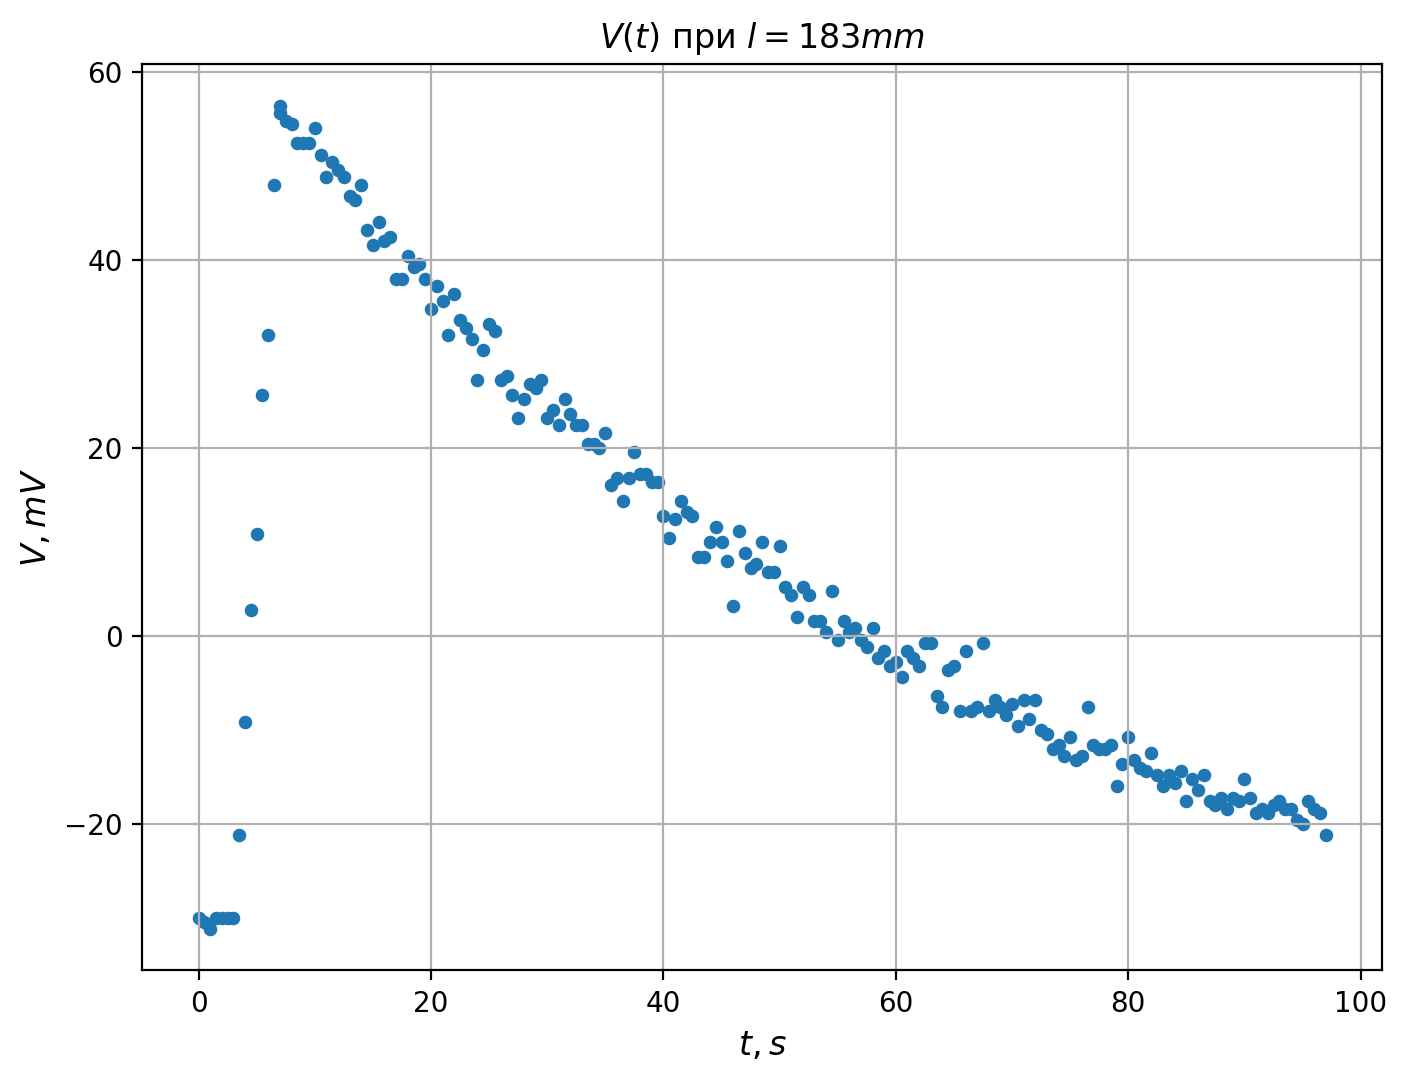

In [23]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"$V(t)$ при $l=183mm$")
plt.xlabel(r"$t, s$", fontsize=12)
plt.ylabel(r"$V, mV$", fontsize=12)

plt.scatter(t, V, s=15)

plt.savefig('../plots/V_t_183.png')

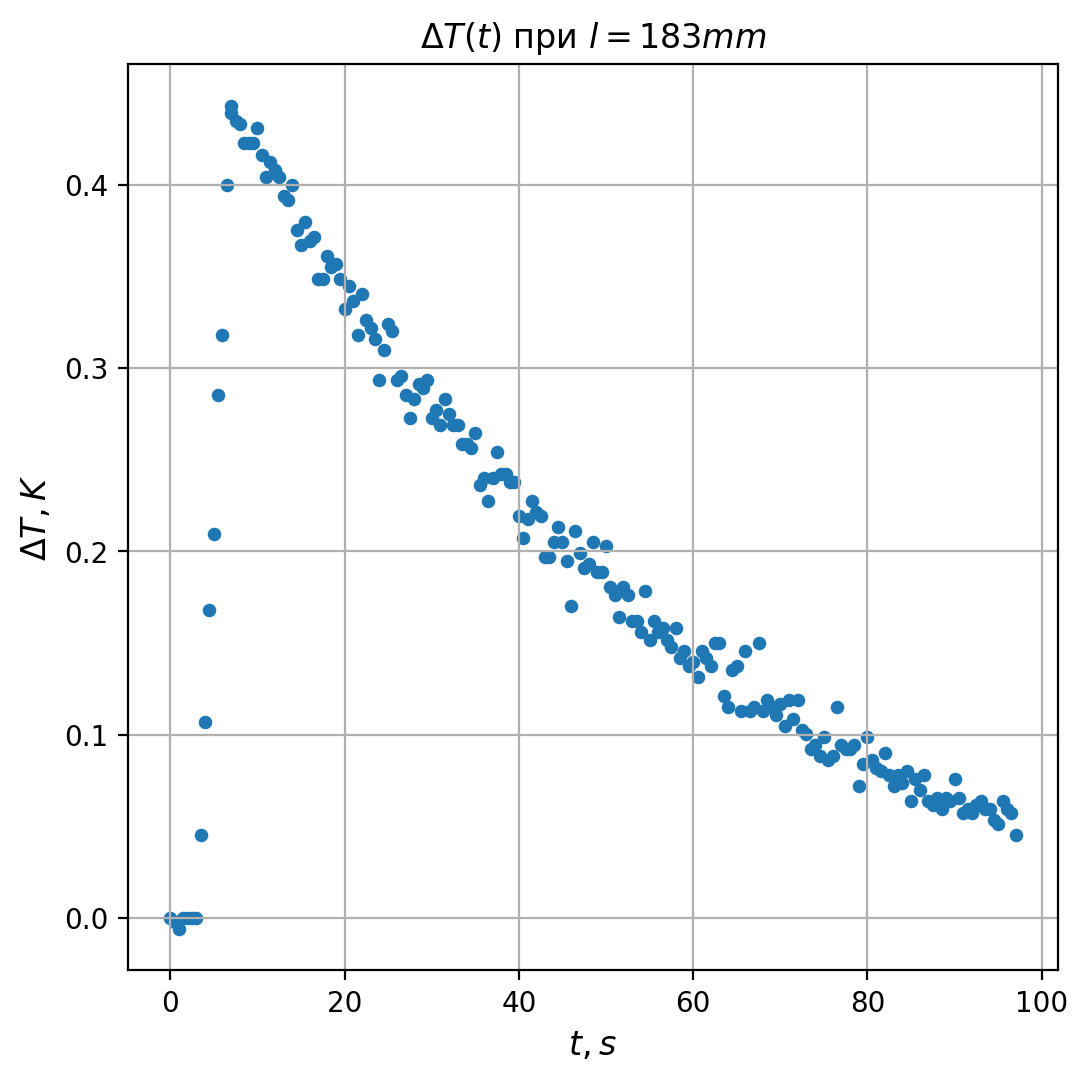

In [24]:
plt.figure(figsize=(6, 6), dpi=200)
plt.grid(True)
plt.title(r"$\Delta T(t)$ при $l=183mm$")
plt.xlabel(r"$t, s$", fontsize=12)
plt.ylabel(r"$\Delta T, K$", fontsize=12)

T = (V - V[0]) / c

plt.scatter(t, T, s=15)

plt.savefig('../plots/T_t_183.png')

-0.021212866966811735 -0.646622198189056 0.0005752564329932819 0.02138047157703264


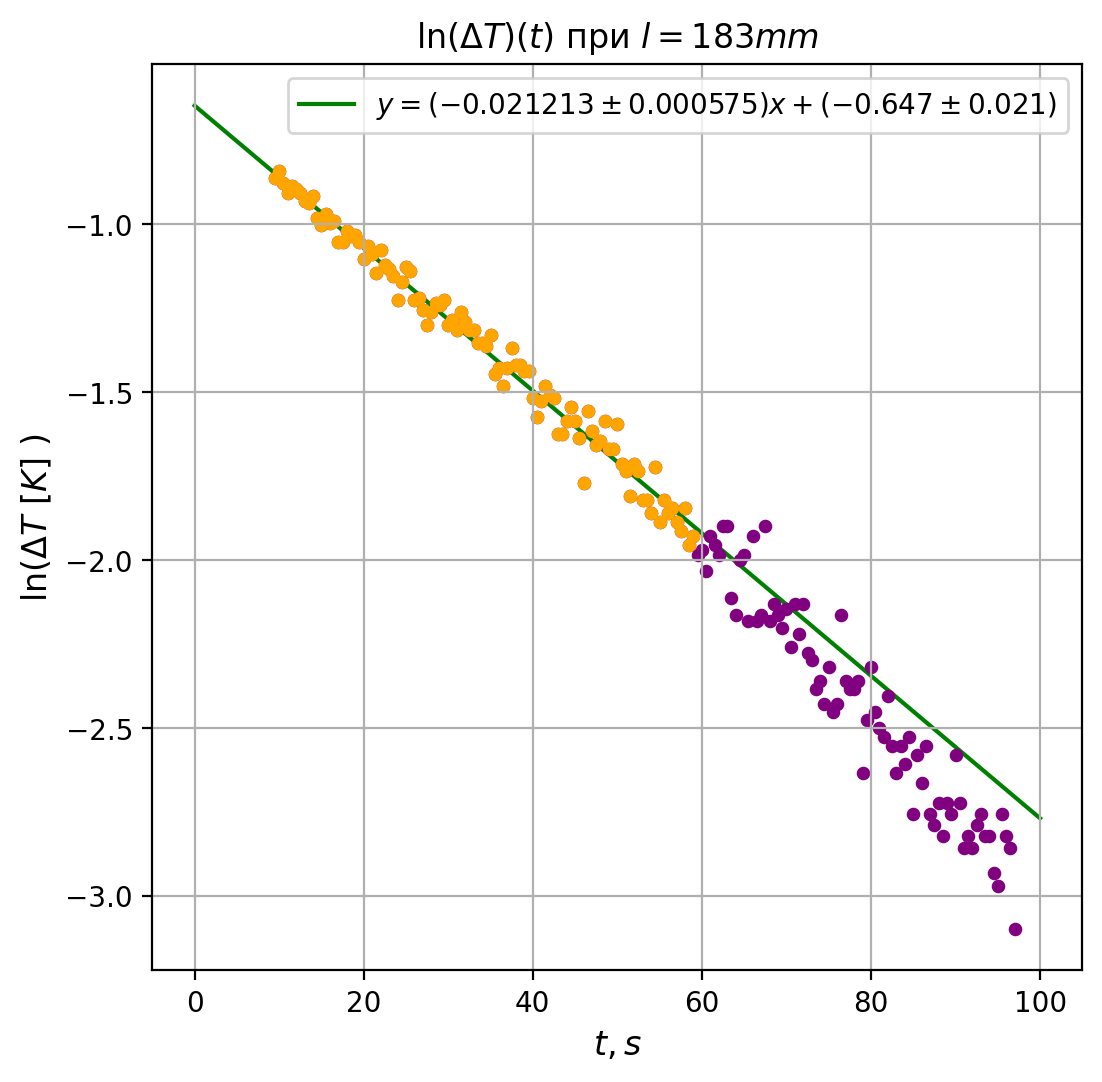

In [25]:
plt.figure(figsize=(6, 6), dpi=200)
plt.grid(True)
plt.title(r"$\ln(\Delta T)(t)$ при $l=183mm$")
plt.xlabel(r"$t, s$", fontsize=12)
plt.ylabel(r"$\ln(\Delta T\ [K]\ )$", fontsize=12)

T = (V - V[0]) / c

sl = slice(20, None)
mnk_sl = slice(0, 100)

X = t[sl]
Y = np.log(T[sl])

plt.scatter(X, Y, s=15, color='purple')
plt.scatter(X[mnk_sl], Y[mnk_sl], s=15, color='orange')

a, b, da, db = mnk(X[mnk_sl], Y[mnk_sl])
print(a,b,da,db)
x_mm = np.array([0, 100])
plt.plot(x_mm, a*x_mm + b, color='green', label=f"$y=({a:.6f} \pm {da:.6f})x+({b:.3f} \pm {db:.3f})$", zorder=-1)
plt.legend()

plt.savefig('../plots/lnT_t_183.png')

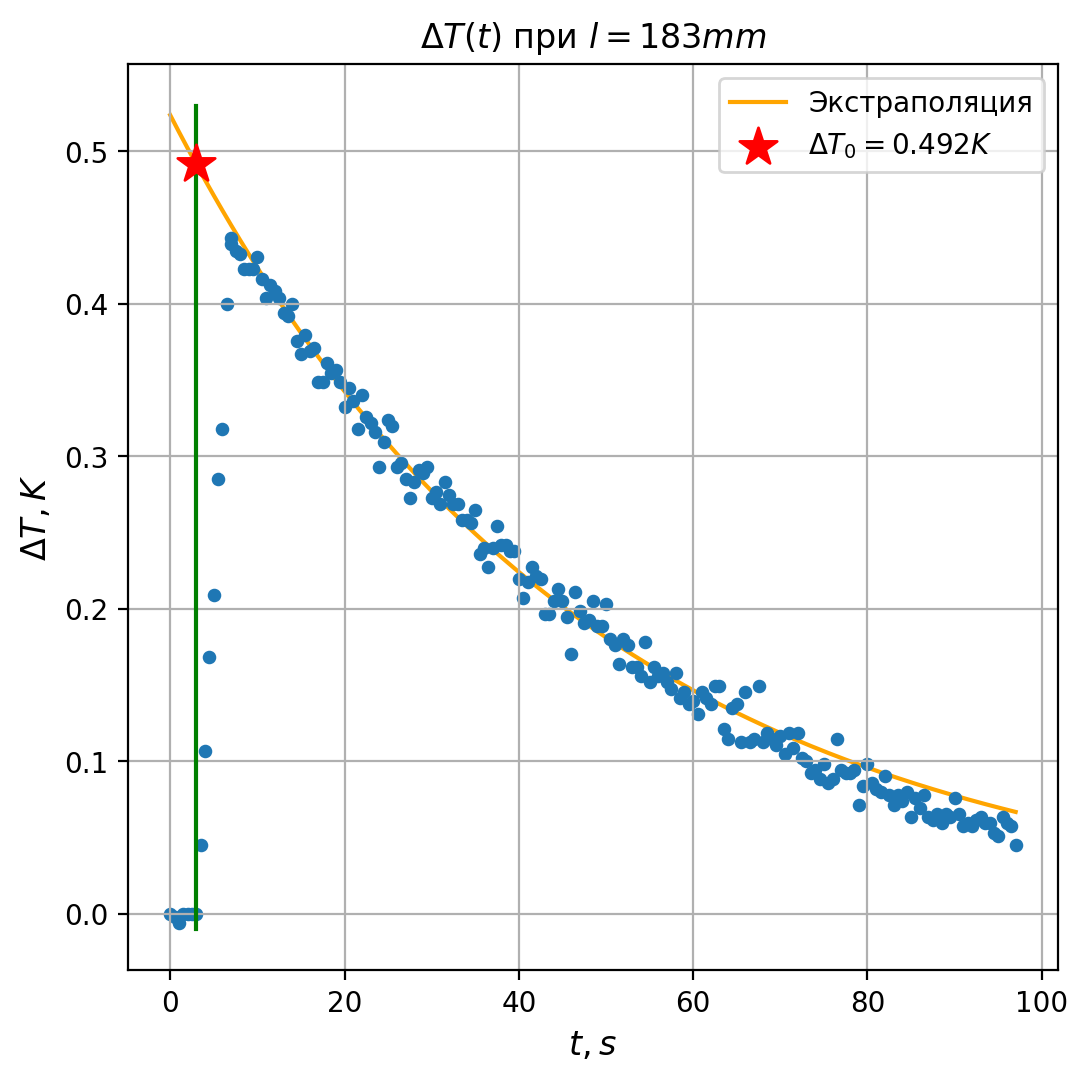

In [26]:
plt.figure(figsize=(6, 6), dpi=200)
plt.grid(True)
plt.title(r"$\Delta T(t)$ при $l=183mm$")
plt.xlabel(r"$t, s$", fontsize=12)
plt.ylabel(r"$\Delta T, K$", fontsize=12)

T = (V - V[0]) / c

plt.plot(t, np.exp(b)*np.exp(a*t), color='orange', label='Экстраполяция', zorder=-1)
plt.scatter(t, T, s=15)

plt.plot([3, 3], [-0.01, 0.53], color='green')
plt.scatter([3], [np.exp(b)*np.exp(a*3)], marker='*', color='red', s=200, zorder=4, label=f'$\Delta T_0 = {np.exp(b)*np.exp(a*3):.3f}K$')

plt.legend()
plt.savefig('../plots/T_t_183_extrapolation.png')

In [27]:
t0 = 3
dt0 = 0.5
DT = np.exp(b)*np.exp(a*t0)
dDT = DT*np.sqrt(db**2 + (a*dt0)**2 + (t0*da)**2)
DT,dDT,100*dDT/DT

(0.4915159938203366, 0.01176150916783615, 2.3929046695752736)

In [28]:
adiabat

,l,dl,T,dT,A,dA
0,134,1.0,0.060855,0.005882,0.060153,0.006698
1,143,1.0,0.105983,0.006769,0.102799,0.008813
2,152,1.0,0.165470,0.007915,0.154923,0.010926
3,158,1.0,0.215385,0.006487,0.194572,0.012344
4,164,1.0,0.257436,0.006211,0.237931,0.013775
5,168,1.0,0.296068,0.010897,0.268824,0.014738
6,174,1.0,0.355556,0.006116,0.318043,0.016199
7,183,1.0,0.445812,0.011764,0.398126,0.018433


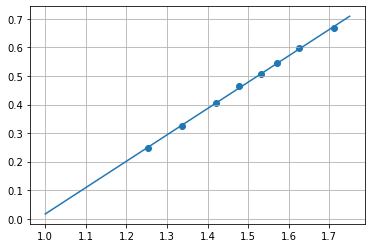

In [29]:
T = adiabat['T']
L = adiabat['l']/l0

X = L
Y = np.sqrt(T)
plt.grid(True)
plt.scatter(X,Y)

a, b, da, db = mnk(X, Y)
x_mm = np.array([1, 1.75])
plt.plot(x_mm, a*x_mm+b)